# CPS 840 / CP 8318
# Assignment 1 - [Shaun Mathew]
## Part 1 [20 Marks]

[6 Marks] 
# a

Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values.


In [136]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]




Final Iter: 11536 Train Cost: 3955.0198539230164 Train Cost Delta: 9.986251825466752e-10
Final W_1: [938.22268454]
Final W_0: [152.91886902]
Test Cost: 2548.089642920829


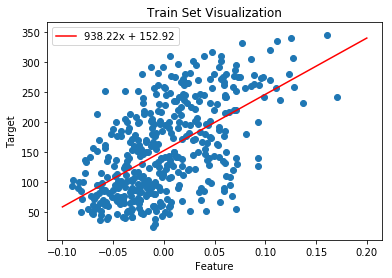

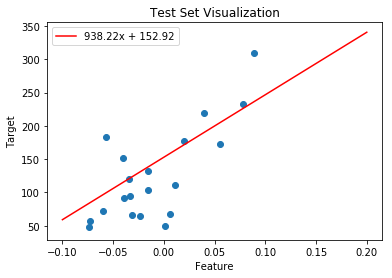

In [137]:
##### YOUR CODE HERE #######
rand_state = np.random.RandomState(seed=0)

#Changing targets a bit for vectorization
diabetes_Y = diabetes.target[:, np.newaxis]

diabetes_y_train = diabetes_Y[:-20]
diabetes_y_test = diabetes_Y[-20:]

W_1 = rand_state.randn(1)
W_0 = rand_state.randn(1)

import matplotlib
import matplotlib.pyplot as plt

'''
N = Size of training set
L_i = MSE for single example i.e. (0.5(y_i - y_pred_i)^2)/n
Cost = L1 + L2 + ... + LN

Let p denote the partial derivative

Since x_i is 1D

pL_i/pW_1 = -((y_i - (x_i*W_1 + W_0))x_i)/n
pCost/pW_1 = pL_1/pW_1 + pL_2/pW_1 + ... + pL_n/pW_1

Repeating for W_0...

pL_i/pW_0 = -(y_i - (x_i*W_1 + W_0))/n
pCost/pW_0 = pL_1/pW_0 + pL_2/pW_0 + ... + pL_n/pW_0

Vectorizing for W_1 and W_0 separately

pCost/pW_1 = -((y - (XW_1 + W_0)).T).dot(X)
pCost/pW_0 = -((y - (XW_1 + W_0)).T).dot(np.ones_like(X))

(alpha is learning rate)

Thus,

W_1 = W_1 - alpha*pCost/pW_1
W_0 = W_0 - alpha*pCost/pW_0
'''

#Performing gradient descent. Stopping criteria is when differences between 
#curr_cost and prev_cost < epsilon or num_iter > MAX_ITER

regress_val = lambda X,W_1,W_0: X*W_1 + W_0

#diabetes_Y_pred_train = diabetes_X_train*W_1 + W_0
diabetes_y_pred_train = regress_val(diabetes_X_train,W_1,W_0)

num_iter = 0
MAX_ITER = 30000
EPSILON = 1e-9
ALPHA = 0.001
curr_cost = mean_squared_error(diabetes_y_train, diabetes_y_pred_train)
prev_cost = 0

while abs(curr_cost - prev_cost) > EPSILON and num_iter < MAX_ITER:
    num_iter += 1
    
    pred = regress_val(diabetes_X_train,W_1,W_0)
    
    #Implicitly including the -1 that occurs during differentiation through +=

    pCpW_1 = ((diabetes_y_train - pred).T).dot(diabetes_X_train)
    pCpW_0 = ((diabetes_y_train - pred).T).dot(np.ones_like(diabetes_X_train))  

    W_1 += ALPHA*pCpW_1[0]
    W_0 += ALPHA*pCpW_0[0]
    
    prev_cost = curr_cost
    curr_cost = mean_squared_error(diabetes_y_train,regress_val(diabetes_X_train, W_1, W_0))
    
print("Final Iter: " + str(num_iter), "Train Cost: " + str(curr_cost), "Train Cost Delta: " + str(abs(curr_cost - prev_cost)))
print("Final W_1: " + str(W_1))
print("Final W_0: " + str(W_0))

print("Test Cost: " + str(mean_squared_error(diabetes_y_test,regress_val(diabetes_X_test, W_1, W_0))))

t = np.linspace(-0.1, 0.2, 400)
y_pred = W_1*t + W_0
line_fit = plt.plot(t, y_pred, color='r',label='{:.2f}x + {:.2f}'.format(W_1[0], W_0[0]))
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.title("Train Set Visualization")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

plt.show()

line_fit = plt.plot(t, y_pred, color='r',label='{:.2f}x + {:.2f}'.format(W_1[0], W_0[0]))
plt.scatter(diabetes_X_test, diabetes_y_test)
plt.title("Test Set Visualization")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

[2 Marks]
# b

Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and classification. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.

Explanation: 

Before preprocessing, there are 45466 entries in meta_data. Therefore, I decided to randomly split the  dataset into 3 sets: training, validation and testing. The training split will contain 70% of the data; whereas, the validation and testing will each contain 15% of the data.


In [138]:
import pandas as pd 
import numpy as np
from ast import literal_eval
import re
import matplotlib
import matplotlib.pyplot as plt

#Loading in data
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
rating_data=pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')


# The following line is one way of cleaning up the genres field - there are more verbose ways of doing this that are easier for a human to read
meta_data['genres'] = meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta_data['year'] = pd.to_datetime(meta_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
meta_data['adult'] = meta_data['adult'].apply(lambda x: 0 if x == "False" else 1)

#cleaning up columns
meta_data['budget'] = meta_data['budget'].apply(str).apply(lambda x: x if re.match("\d+",x) else 0).apply(float)
meta_data['popularity'] = meta_data['popularity'].apply(str).apply(lambda x: x if re.match("\d+",x) else 0).apply(float)

#creating new feature
meta_data['votecountratio'] = meta_data['vote_count']/(meta_data['vote_average'] + 1)

meta_data = meta_data.rename(columns={"id":"movieId"})
meta_data['movieId'] = pd.to_numeric(meta_data['movieId'], errors='coerce')
meta_data = meta_data[~meta_data["imdb_id"].isnull()]
meta_data['imdb_id'] = meta_data['imdb_id'].apply(str).apply(lambda x: x if not x.startswith('tt') else x[2:]).apply(int)
meta_data['english'] = meta_data['original_language'].apply(lambda x: 1 if x == 'en' else 0)

#Getting average rating for each movie
rating_avg = rating_data.groupby('movieId').agg({'rating':['mean']})
rating_avg.columns = rating_avg.columns.droplevel()
rating_avg = rating_avg.rename(columns={'mean': 'avg_rating'})

#Merging ratings with links
linked_data = pd.merge(rating_avg, links,left_index=True, right_on="movieId")
linked_data["imdbId"] = pd.to_numeric(linked_data['imdbId'], errors='coerce')

#Filtering out movies that have no revenue information?
meta_data = meta_data[meta_data['revenue'] > 0]
meta_data = meta_data[~meta_data["revenue"].isnull()]

#Merging ratings with meta_data
meta_data_merged = pd.merge(meta_data, linked_data, left_on="imdb_id", right_on="imdbId")

# genres = set(genre for genres in meta_data["genres"] for genre in genres)
# not_genres = {'Aniplex','BROSTA TV','Carousel Productions','GoHands',
#               'Mardock Scramble Production Committee','Odyssey Media','Pulser Productions',
#               'Rogue State','Sentai Filmworks','Telescene Film Group Productions',
#               'The Cartel','Vision View Entertainment'}
# genres -= not_genres


import warnings; warnings.simplefilter('ignore')

rand_state = np.random.RandomState(seed=0)

def split_data(data, train_percent=0.7, valid_percent=0.15, test_percent=0.15):
    data_length = len(data)
    print("Data Length: " + str(data_length))

    rand_perm = rand_state.permutation(data_length)
    
    #Randomly splitting into train, valid and test indices
    train_split = rand_perm[:int(train_percent*data_length)]
    valid_split = rand_perm[int(train_percent*data_length):int((train_percent + valid_percent)*data_length)]
    test_split = rand_perm[int((train_percent + test_percent)*data_length):]
    
    #Getting relevant rows
    train_data = data.iloc[train_split]
    valid_data = data.iloc[valid_split]
    test_data = data.iloc[test_split]
    
    return train_data, valid_data, test_data

#Getting labels and features as numpy matrices
def get_data_label_matrix(dataset,label="revenue",features=("budget", "popularity", "vote_count", "votecountratio")):
    labels = dataset[label].values
    data = dataset[list(features)].values
    
    return data, labels

#splitting data nad getting matrices
train_data, valid_data, test_data = split_data(meta_data_merged)

train_X, train_Y = get_data_label_matrix(train_data)
valid_X, valid_Y = get_data_label_matrix(valid_data)
test_X, test_Y = get_data_label_matrix(test_data)

print("Train split size: " + str(len(train_data)))
print("Valid split size: " + str(len(valid_data)))
print("Test split size: " + str(len(test_data)))

display(train_data.head())
display(valid_data.head())

Data Length: 7399
Train split size: 5179
Valid split size: 1110
Test split size: 1110


,adult,belongs_to_collection,budget,genres,homepage,movieId_x,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,year,votecountratio,english,avg_rating,movieId_y,imdbId,tmdbId
4061,0,NaN,2000000.0,[Documentary],http://www.noendinsightmovie.com,12901.0,912593,en,No End in Sight,"Chronological look at the fiasco in Iraq, espe...",...,False,7.3,23.0,2007,2.771084,1,3.806452,55071,912593,12901.0
1573,0,NaN,1.0,"[Drama, Comedy]",NaN,3082.0,27977,en,Modern Times,The Tramp struggles to live in modern industri...,...,False,8.1,881.0,1936,96.813187,1,4.096996,3462,27977,3082.0
467,0,NaN,6000000.0,"[Drama, War, Action]",NaN,792.0,91763,en,Platoon,"As a young and naive recruit in Vietnam, Chris...",...,False,7.5,1236.0,1986,145.411765,1,3.906706,1090,91763,792.0
526,0,"{'id': 230, 'name': 'The Godfather Collection'...",13000000.0,"[Drama, Crime]",NaN,240.0,71562,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,...,False,8.3,3418.0,1974,367.526882,1,4.263475,1221,71562,240.0
6583,0,NaN,3500000.0,"[Mystery, Horror]",http://a24films.com/films/witch/,310131.0,4263482,en,The Witch,New England in the 1630s: William and Katherin...,...,False,6.3,1471.0,2016,201.506849,1,3.567262,140267,4263482,310131.0


,adult,belongs_to_collection,budget,genres,homepage,movieId_x,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,year,votecountratio,english,avg_rating,movieId_y,imdbId,tmdbId
4440,0,"{'id': 9485, 'name': 'The Fast and the Furious...",85000000.0,"[Action, Crime, Drama, Thriller]",http://www.fastandfuriousmovie.net,13804.0,1013752,en,Fast & Furious,"When a crime brings them back to L.A., fugitiv...",...,False,6.5,2426.0,2009,323.466667,1,3.216334,67923,1013752,13804.0
3377,0,NaN,10000000.0,"[Drama, History]",NaN,30973.0,377992,en,The Visual Bible: The Gospel of John,A word for word depiction of the life of Jesus...,...,False,8.2,12.0,2003,1.304348,1,3.500000,27841,377992,30973.0
7251,0,NaN,0.0,"[Drama, Family]",NaN,13841.0,91817,en,Rad,A BMX racer who lives in a small town with his...,...,False,7.1,27.0,1986,3.333333,1,3.375000,170217,91817,13841.0
4538,0,NaN,0.0,"[Documentary, Music]",NaN,22492.0,1229360,en,It Might Get Loud,A documentary on the electric guitar from the ...,...,False,7.4,54.0,2009,6.428571,1,3.699681,70862,1229360,22492.0
6403,0,NaN,0.0,[Thriller],NaN,284289.0,2911668,en,Beyond the Reach,A high-rolling corporate shark and his impover...,...,False,5.5,138.0,2014,21.230769,1,2.709677,132442,2911668,284289.0


[5 Marks]
# c

Organize the data into relevant features for predicting revenue. <br>
i.  Explain your feature sets and organization. <br>

Organization:

First, I preprocessed the data by removing rows with null revenues and null ids and values that did not correspond to the column they were in. I then changed the imdb_id column to numeric values to make merging easier. I then removed movies that had no revenue reported i.e. 0 revenue since it is extremely likely for a movie to not have had any tickets purchased; however, this eliminated about 37000 movies from meta_data. I also added a new column which indicates whether the movie's original language was english. Finally, I merged the meta_data with the ratings data using links.csv.

Feature Selection:

As a start, I removed features from meta_data.csv which I deemed were irrelevant to determining the revenue or difficult to encode information about e.g. id and original_title. I then looked at the other datasets provided and came to the following conclusions: 

1. Ratings provides a lot of user level information that could be important in determining revenue. I grouped the ratings by movie and calculated the average user rating (avg_rating) for every movie. I then inner joined this table with the links table using the movie's imdb_id. Lastly, I joined this resulting relation with meta_data to get an average_rating for every movie.

2. keywords.csv has over 19956 unique keywords. Representing this as a onehot encoded vector would increase the dimensionality too much and would be impractical. An alternative would be to take the top 10 popular keywords and encode them as a vector; however, I did not do this for the following reasons: the most popular tag occurs in only 7% of all movies and about 75% of the movies do not contain any of the top 10 keywords. This leads me to believe that they might not be very useful in determining revenue.

             626: ['revenge'],
             629: ['biography'],
             636: ['nudity'],
             651: ['violence'],
             685: ['sex'],
             734: ['musical'],
             835: ['based on novel'],
             1308: ['murder'],
             1930: ['independent film'],
             3115: ['woman director']}
             
4. Crew.csv contains useful information such as the director and names of the cast. Coupled with information about the popularity of the director and cast members, crew.csv could add valuable information useful in determining the popularity of the movie. However, I feel it is best to fit a model with a minimal set of features first and looking at the performance on the training and validation sets before deciding to add more features. Furthermore, it is possible that the budget feature could act as a very crude proxy for these features.   

I then used a correlation matrix on meta_data_merged for additional confirmation as to which features were possibly relevant to predicting the revenue. From this, I was able to see that vote average was not a good indicator of revenue, since you could have movies with a 10.0 score but only 1 vote cast. In order to combat this, I replaced this feature with a vote_count to vote_average ratio. From the new correlation matrix, we can see that this is highly correlated with revenue, more so than vote_count. 

ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings. <br>

There are a lot of movies with a revenue of 0 but have some rating; this may be due to errors in the data. Movie rating and revenue are not linearly correlated. There appears to be some sort of curve of best fit to the plot where higher revenues seem to converge to a rating around a 4. Average rating alone may not be a sufficient predictor of revenue as we can see from the amount of noise in the data.

iii. Visualize any other relationships you deem interesting and explain. <br>
 
I have chosen to visualize the effect of average rating and budget vs revenue using a 3D plot. The high budget movies have a rating around 2.5 to 3.5. A lot of movies are clustered around a low budget and medium rating. I have also visualized a scatter_matrix and histograms of the data. Looking along the revenue row, we see a lot of the features exhibit very little correlation.


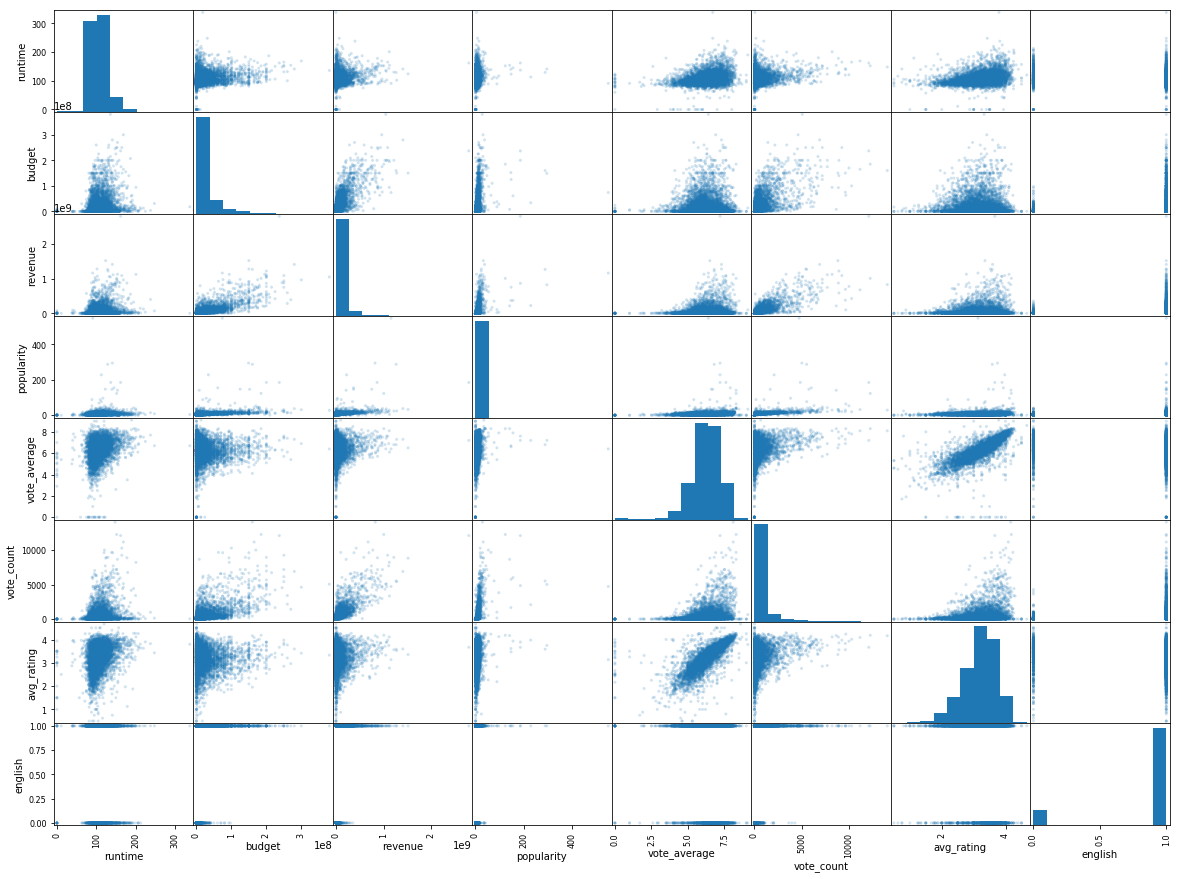

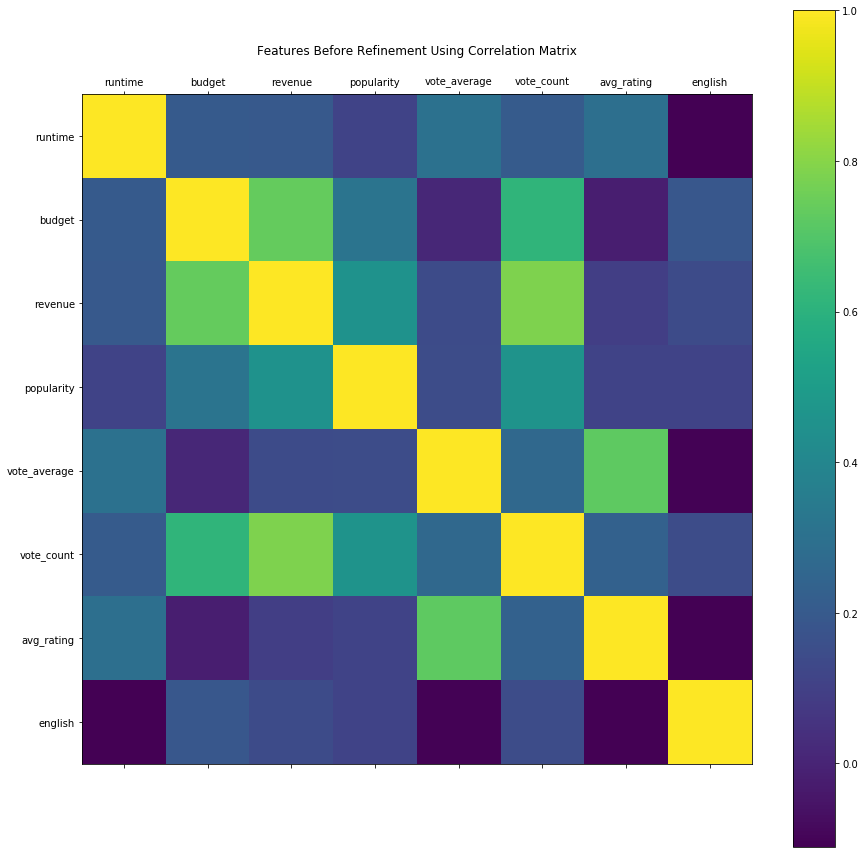

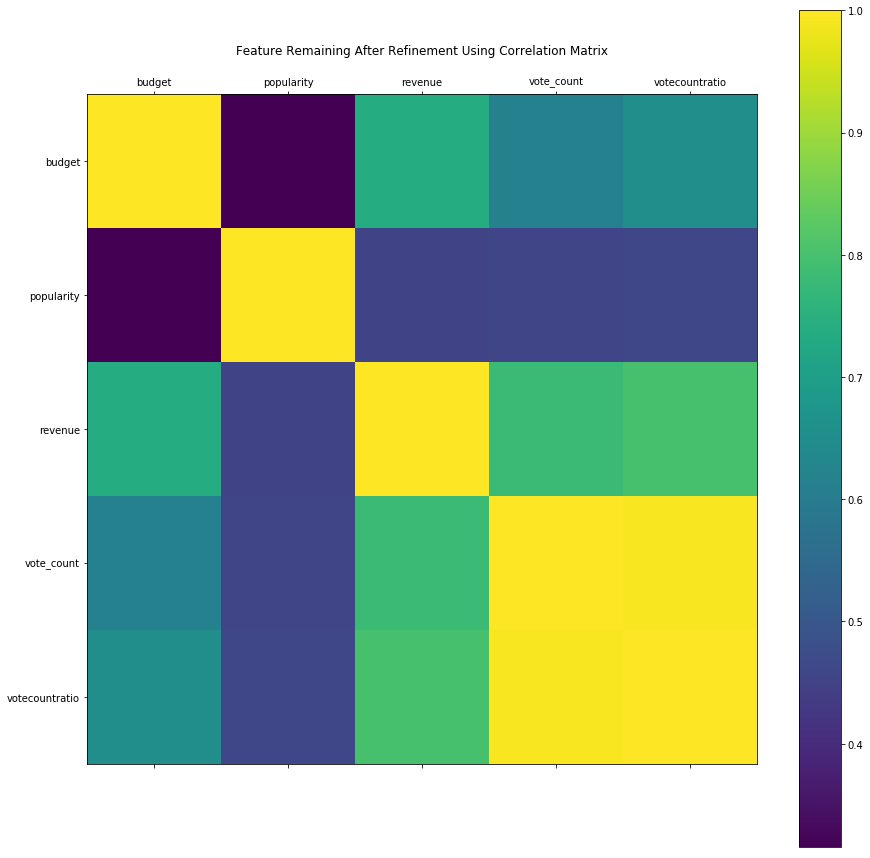

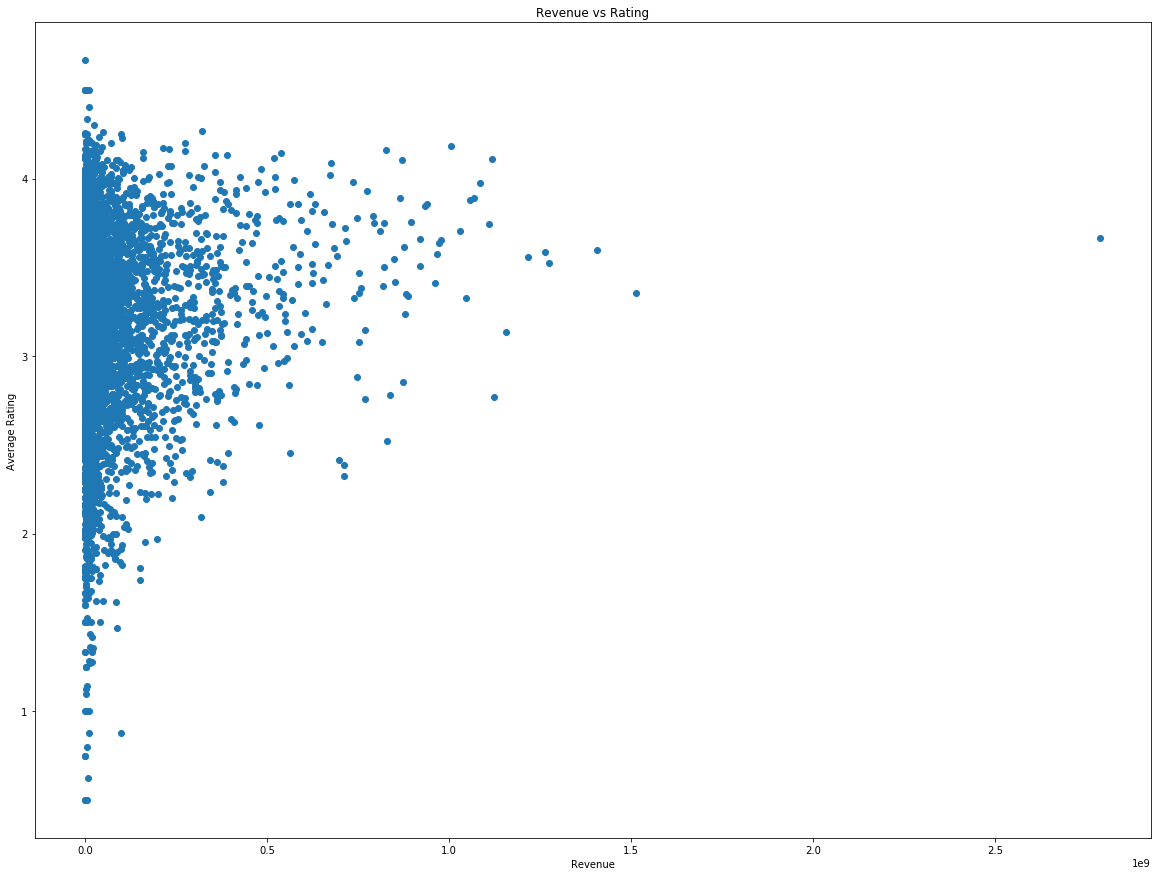

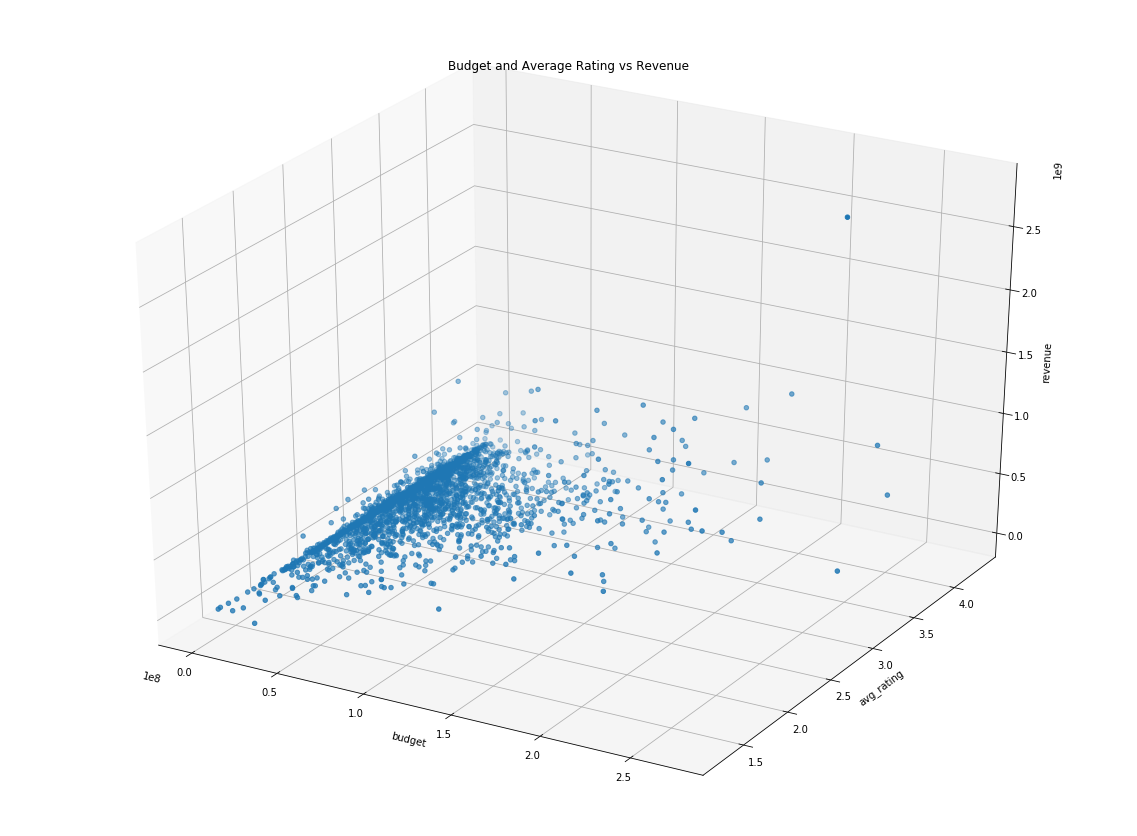

In [6]:
from mpl_toolkits.mplot3d import Axes3D 
from pandas.plotting import scatter_matrix

matplotlib.rcParams['figure.figsize'] = [20, 15]

#Features to visualize for correlation
first_filtered_features = ["runtime", "budget", "revenue", "popularity", "vote_average", "vote_count", "avg_rating", "english"]
refined_filtered_features = ["budget", "popularity", "revenue", "vote_count", "votecountratio"]

#Plotting scatter plot for all feature pairs and histograms for each feature
scatter_matrix(train_data[first_filtered_features], alpha=0.2)

plt.matshow(train_data[first_filtered_features].corr(), cmap='viridis')
plt.xticks(range(len(first_filtered_features)), first_filtered_features)
plt.yticks(range(len(first_filtered_features)), first_filtered_features)
plt.colorbar()
plt.title("Features Before Refinement Using Correlation Matrix")
plt.show()

plt.matshow(train_data[refined_filtered_features].corr(), cmap='viridis')

plt.xticks(range(len(refined_filtered_features)), refined_filtered_features)
plt.yticks(range(len(refined_filtered_features)), refined_filtered_features)
plt.colorbar()
plt.title("Feature Remaining After Refinement Using Correlation Matrix")
plt.show()

plt.scatter(train_data["revenue"], train_data["avg_rating"])
plt.title("Revenue vs Rating")
plt.xlabel("Revenue")
plt.ylabel("Average Rating")
plt.show()
 
#visualizing random perm
samples = np.random.permutation(len(train_data))[:3500]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("budget")
ax.set_ylabel("avg_rating")
ax.set_zlabel("revenue")
ax.set_title("Budget and Average Rating vs Revenue")
ax.scatter(train_data["budget"][samples], train_data["avg_rating"][samples], train_data["revenue"][samples])
plt.show()

# Consider how to columns look before and after this 'clean-up' - it is very common to have to massage the data to get the right features

In [74]:
#Preprocessing - Note some more preprocessing takes place in the first cell with meta_data

# temp_features = ["budget", "popularity", "vote_count", "votecountratio"]
# train_mean = train_data[temp_features].mean()
# train_std = train_data[temp_features].std()

# # #Trying out some feature normalization
# train_data[temp_features] = (train_data[temp_features] - train_mean)/(train_std)
# valid_data[temp_features] = (valid_data[temp_features] - train_mean)/(train_std)
# test_data[temp_features] = (test_data[temp_features] - train_mean)/(train_std)

# # #Normalized values
# train_X, train_Y = get_data_label_matrix(train_data)
# valid_X, valid_Y = get_data_label_matrix(valid_data)
# test_X, test_Y = get_data_label_matrix(test_data)

[3 Marks]
# d

Train a regression model to predict movie revenue. Plot predicted revenue vs. actual revenue on the test set. Quantify the error in your prediction. (You may use sklearn for this step)

Train R^2 score:  0.729638687603261
Coefficients:  [ 1.44007911e+00  1.15616631e+06 -1.93870626e+02  5.32113250e+05]
Bias:  -12355510.562381491

Average Absolute Error on Test:  42034908.874723576
Max Absolute Error on Test:  1192370168.833291
Test R^2 score:  0.6953964714077056


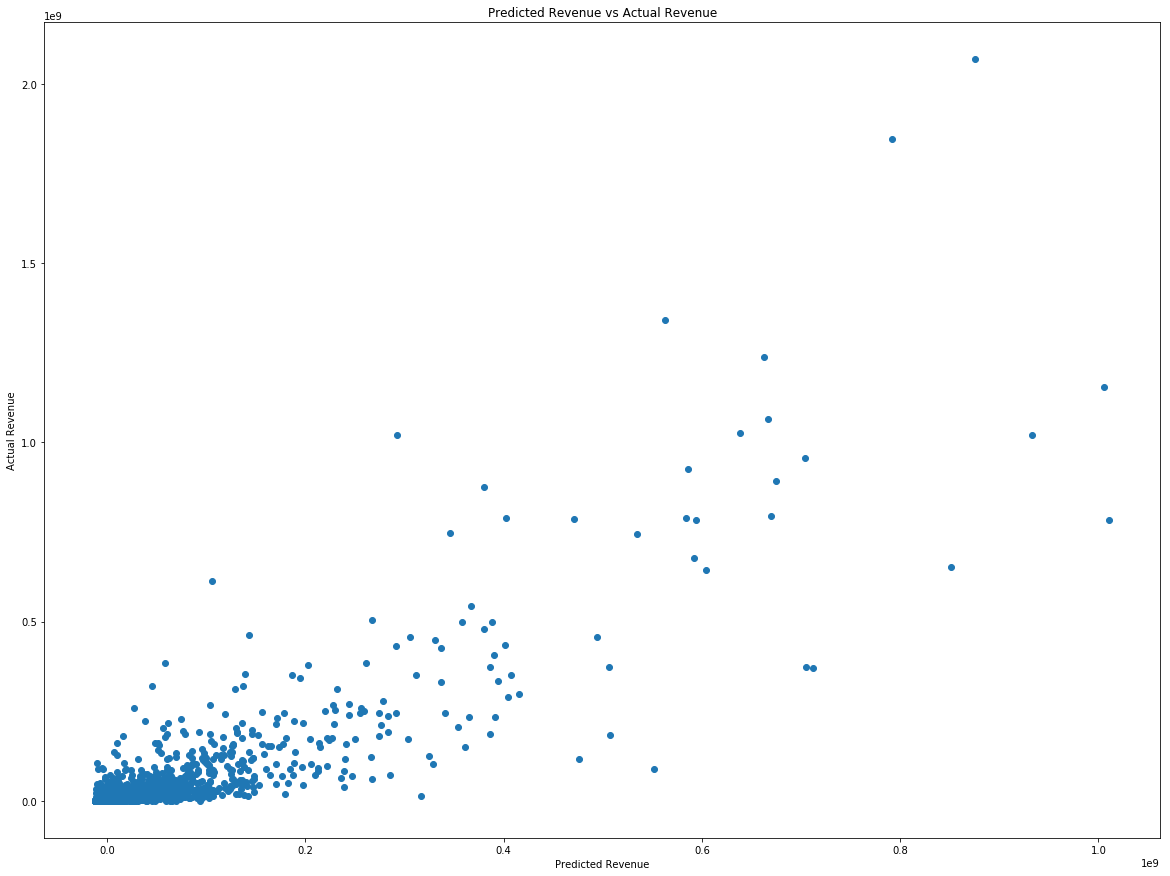

In [9]:
# Regression model here, plot your fit to the revenue data versus the actual data from the test set as a scatter plot.
from sklearn.linear_model import LinearRegression

#Fitting regression model
reg = LinearRegression(normalize=True).fit(train_X, train_Y)
print("Train R^2 score: ", reg.score(train_X, train_Y))
print("Coefficients: ", reg.coef_)
print("Bias: ", reg.intercept_)

preds = reg.predict(test_X)

'''
I chose to use the following error metric in conjunction to the R^2 score. It is essentially
the mean-squared loss but with an absolute value since I am trying to relate this to a dollar amount.

sum(abs(preds - actual))/num_samples
'''

avg_abs_err = sum(abs(preds - test_Y))/len(test_Y)
max_abs_err = max(abs(preds - test_Y))
print("\nAverage Absolute Error on Test: ", avg_abs_err)
print("Max Absolute Error on Test: ", max_abs_err)
print("Test R^2 score: ", reg.score(test_X, test_Y))

plt.scatter(preds, test_Y)
plt.title("Predicted Revenue vs Actual Revenue")
plt.xlabel("Predicted Revenue")
plt.ylabel("Actual Revenue")
plt.show()

[4 Marks]
# e

Try a non-linear fit to the data, with and without regularization. Find your best fit and justify the choice of parameters, regularization constant and norm. Plot predicted revenue vs. actual revenue on the test set. In each case, quantify the error. (See e.g. Generalized linear models, Kernel Ridge regression, SVR and others from sklearn)

I used cross validation to find the best hyper parameters which turned out to be a kernel ridge regression model with an RBF kernel and a gamma of 0.01 and alpha of 0.1. The fit on the test set is slightly better with regularization as we can see from the predicted vs actual revenue as well as the r2 score.

Train R^2 score:  0.9999826840949365
Test R^2 score:  -317486.06124408345

Average Absolute Error on Test:  4755916677.768455
Max Absolute Error on Test:  2946813212097.0


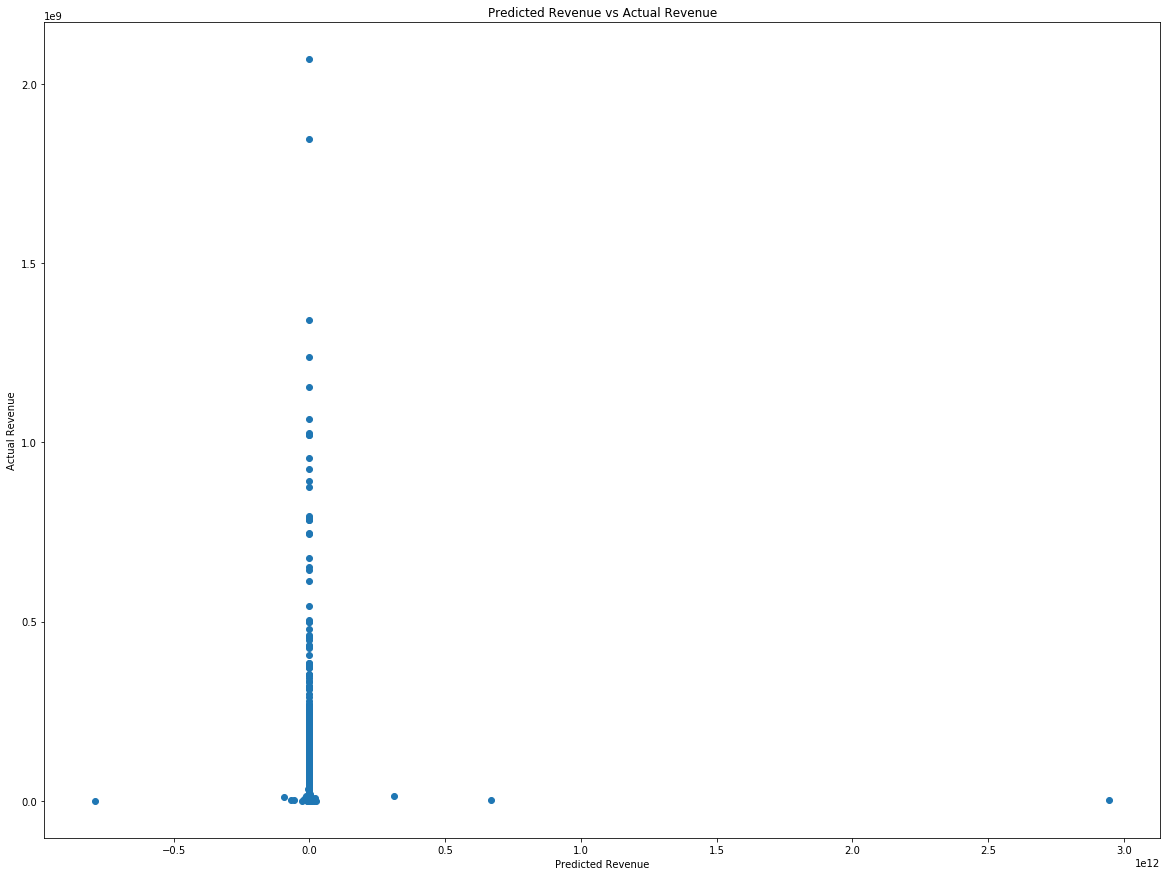

In [21]:
##### YOUR CODE HERE WITHOUT REGULARIZATION #######

import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
import numpy as np


# Fit Kernel Ridge Regression model with RBF kernel - no regularization
krr_rbf = KernelRidge(kernel="rbf", alpha=0).fit(train_X, train_Y)
preds = krr_rbf.predict(test_X)

print("Train R^2 score: ", krr_rbf.score(train_X, train_Y))
print("Test R^2 score: ", krr_rbf.score(test_X, test_Y))

avg_abs_err = sum(abs(preds - test_Y))/len(test_Y)
max_abs_err = max(abs(preds - test_Y))

print("\nAverage Absolute Error on Test: ", avg_abs_err)
print("Max Absolute Error on Test: ", max_abs_err)


plt.scatter(preds, test_Y)
plt.title("Predicted Revenue vs Actual Revenue")
plt.xlabel("Predicted Revenue")
plt.ylabel("Actual Revenue")
plt.show()

Best params found through cross-validation:  {'alpha': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
KernelRidge(alpha=0.1, coef0=1, degree=3, gamma=0.01, kernel='rbf',
      kernel_params=None)
Train R^2 score for KRR with Regularization:  0.9858252145073221
Test R^2 score for KRR with Regularization -0.1588730552221644

Average Absolute Error on Test:  67969986.60380167
Max Absolute Error on Test:  2068223624.0


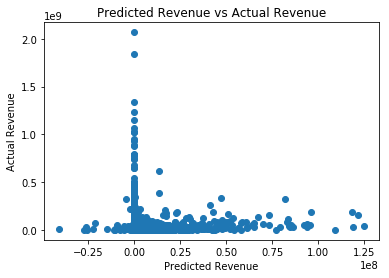

In [139]:
##### YOUR CODE HERE WITH REGULARIZATION #######
#Grid search - for params alpha and gamma
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
import numpy as np

#Performing 2 fold cross-validation on valid set - not using training set due to long runtimes
krr_reg = GridSearchCV(KernelRidge(),cv=2,
                   param_grid={"alpha": [1e-1, 1e-3, 1e-5, 1e-8],
                               "gamma": list(np.logspace(-2, 2, 5)) + [None],
                              "kernel": ["rbf", "poly"]})
krr_reg.fit(valid_X, valid_Y)

print("Best params found through cross-validation: ", krr_reg.best_params_)

print(krr_reg.best_estimator_)
#retraining on training set with best alpha and gamma
krr_reg = krr_reg.best_estimator_.fit(train_X, train_Y)

#Predicting revenue on test_X using best found params
preds = krr_reg.predict(test_X)
print("Train R^2 score for KRR with Regularization: ", krr_reg.score(train_X, train_Y))
print("Test R^2 score for KRR with Regularization", krr_reg.score(test_X, test_Y))

avg_abs_err = sum(abs(preds - test_Y))/len(test_Y)
max_abs_err = max(abs(preds - test_Y))

print("\nAverage Absolute Error on Test: ", avg_abs_err)
print("Max Absolute Error on Test: ", max_abs_err)

plt.scatter(preds, test_Y)
plt.title("Predicted Revenue vs Actual Revenue")
plt.xlabel("Predicted Revenue")
plt.ylabel("Actual Revenue")
plt.show()

## Part 2 [10 Marks]

[4 Marks]
# a

Write a simple version of the basic algorithm for k-means clustering. Simple here means the core of the algorithm and not optimizations or extensions you might find in standard python libraries. Typically you might rely on a standard library for doing this, but it helps to see the core by manipulating the data and labels by hand as practice for numerical python and how to frame the algorithm.

Centers: 
[[-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]]
Number of Iterations: 6


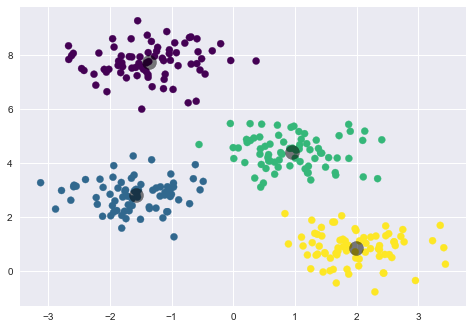

In [141]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np


# Generate Samples
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)

###############################################
# YOUR CODE GOES HERE
# Put some code to find clusters here
# Assign the clusters and labels in your code
###############################################


k=4

#Initializing centers by picking from dataset
centers = X[np.random.choice(X.shape[0],k,replace=False)]
prev_centers = 0
max_iter = 10000
num_iter = 0
epsilon = 1e-12
closest_cluster = [0]*X.shape[0]


while ((centers-prev_centers)**2).sum() > epsilon and num_iter < max_iter:
    num_iter+=1
    #reshaping for finding distance to all centers
    rcenters = centers.reshape(k,1,-1)
    diff = (X - rcenters)**2
    l2norm2 = diff.sum(axis=2)
    
    #finding closest cluster
    closest_cluster = np.argmin(l2norm2, axis=0)
    prev_centers = np.copy(centers)
    
    #reclassifying  and updating centers
    for cluster_index in range(k):
        classified_points = X[closest_cluster==cluster_index]
        centers[cluster_index,:] = classified_points.mean(axis=0)
    
print("Centers: \n" + str(centers))
print("Number of Iterations: " + str(num_iter))

# Uncomment to display clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=closest_cluster,
            s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<a id="data set"></a>
[6 Marks]
# b

Load the mystery data below, and cluster the data (you don't need to use your code from part a). Visualize the data including assigned cluster labels.

In [67]:
# Load the mystery data here and cluster using k-means (now you can use libraries e.g. sklearn)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

num_clusters = 5
mystery = np.load('mystery.npy')
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(mystery) 


Based on the results above and any other analysis you wish to include, discuss how many clusters you see in the data.

Explanation:

Looking at the 2d projection of the data using TSNE, we see that there are 5 clusters. Also if we look at the histograms of the data (in bonus part), we can see 5 families of histograms. Also we can some information from the actual images as well to see that there are 5 clusters. 

In [ ]:
# ##### YOUR (OPTIONAL) CODE HERE#######


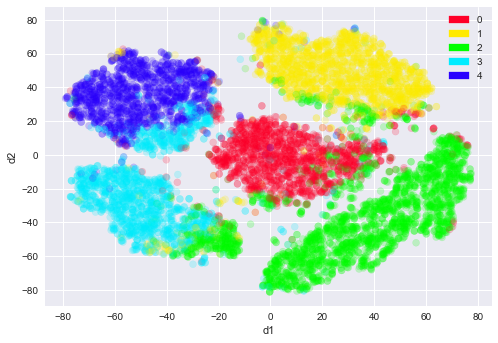

In [68]:
# Find a way to visualize the data (e.g. in 2D or 3D), color datapoints based on assigned labels.
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE

#matplotlib.rcParams['figure.figsize'] = [10, 7]

num_samples=10000
num_vis=10000

#pca = PCA(n_components=3)
#res = pca.fit_transform(mystery[:num_samples])

projection_3d=False

n_components = 3 if projection_3d else 2

#Using TSNE to reduce dimensionality of data
tsne = TSNE(n_components=n_components)
res = tsne.fit_transform(mystery[:num_samples])


d1 = res[:,0]
d2 = res[:,1]

if projection_3d:
    d3 = res[:,2]

#print(pca.explained_variance_ratio_)  

rand_state = np.random.RandomState(seed=0)
indices = rand_state.permutation(num_samples)[:num_vis]
labels = kmeans.labels_[indices]

fig = plt.figure()

if projection_3d:
    ax = fig.add_subplot(111,projection='3d')
else:
    ax = fig.add_subplot(111)
    
ax.set_xlabel("d1")
ax.set_ylabel("d2")

if projection_3d:
    ax.set_ylabel("e3")
    
num_colours = num_clusters
cm = plt.get_cmap('gist_rainbow')

#Using rainbow colour map to generate as many colours we need for clusters from kmeans
patches = {i:mpatches.Patch(color=cm(i/num_colours),label=str(i)) for i in range(num_clusters)}
colours = [patches[label].get_facecolor() for label in labels]

if projection_3d:
    ax.scatter(d1[indices], d2[indices], d3[indices],c=colours, alpha=0.2)
else:
    ax.scatter(d1[indices], d2[indices],c=colours, alpha=0.2)
    
plt.legend(handles=patches.values())
plt.show()


[2 Marks]
# Bonus

What is the mystery data in part 2? Show this in markdown and code below.

Displaying the matrix data, we see that it is some form of grayscale image since the values range from 0 to 255. Based on the dimensionality of the data, I am guessing that it MNIST data which contains digits. However, I believe that it has been transformed somehow obscuring the data as seen by the samples below. Furthermore, I can only see 5 clusters as opposed to the expected 10. Perhaps this indicates, that some of the data may have been combined (e.g. digit 1 combined with digit 7, 2 with digit 9 etc...) or some classes omitted.

(30309, 784)


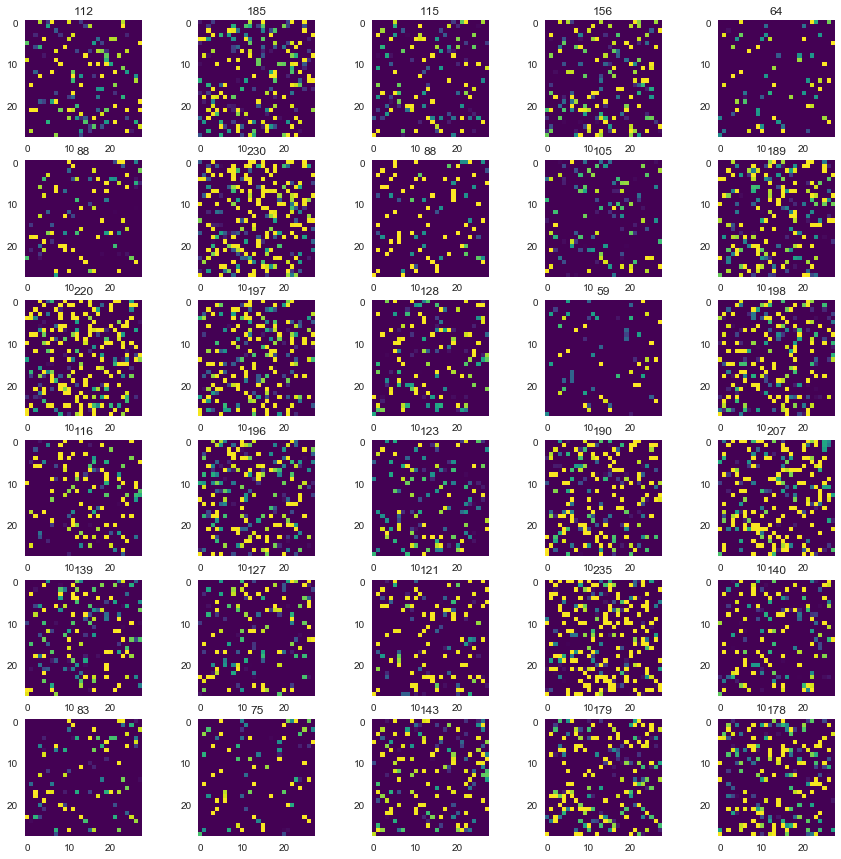

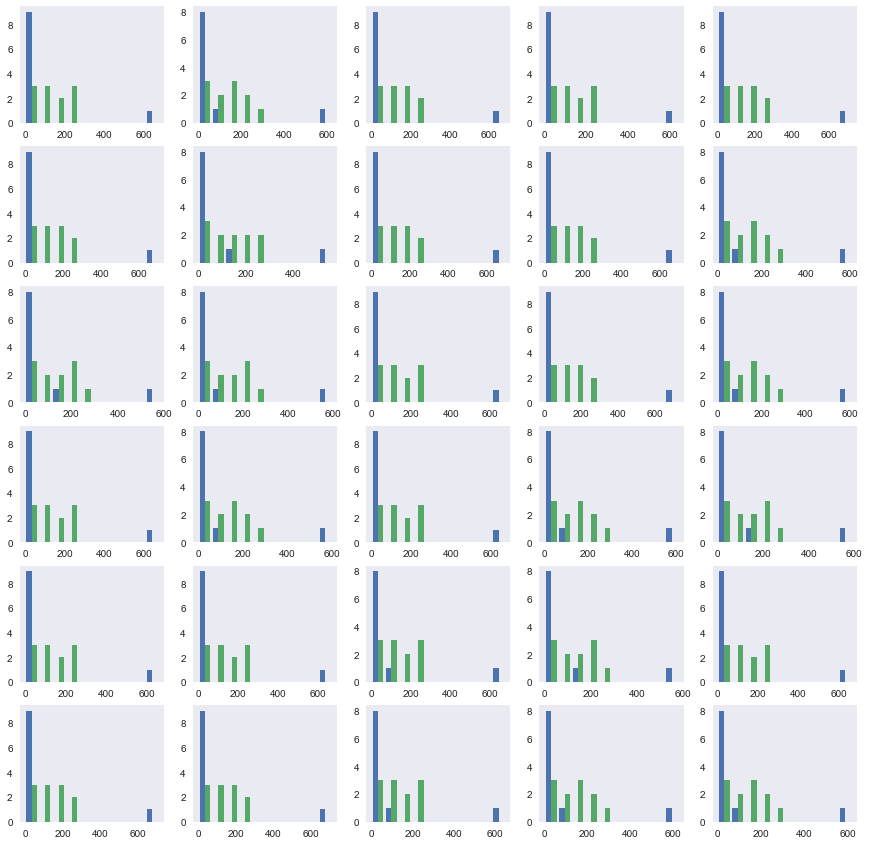

In [63]:
##### YOUR (OPTIONAL) CODE HERE #######
#Visualization of multiple images
#Histogram of multiple images

import matplotlib.pyplot as plt
from numpy.linalg import svd

columns = 5
rows = 6

#z = (x - mean)/std

row_mean = np.mean(mystery, axis=1)
row_std = np.std(mystery, axis=1)

print(mystery.shape)

rand_sample = mystery[np.random.randint(len(mystery), size=columns*rows)]
fig=plt.figure(figsize=(15, 15))

#Displaying a random sample of images
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    num_over_0 = np.count_nonzero(rand_sample[i-1])
    #Number of non zero pixels
    plt.title(num_over_0)
    plt.imshow(rand_sample[i-1].reshape(28,28), cmap="viridis")
    plt.grid(False)

plt.show()

fig=plt.figure(figsize=(15, 15))

#Displaying histogram of values image takes
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    histogram = np.histogram(rand_sample[i-1])
    plt.hist(histogram)
    plt.grid(False)

plt.show()
    

[10 Marks]
# CP 8318 Questions

Describe how you might implement a solution to recommend new movies to a user based on their existing preferences or ratings from Part 1.

I decided to implement a memory based collaborative filtering technique for my recommender system (https://en.wikipedia.org/wiki/Collaborative_filtering). I also using the ratings provided in ratings_small for faster runtimes.

The idea behind this approach is as follows:

1. Compute user similarities to people who have actually rated the movie.
2. Take the top N most similar users who have rated said movie
3. Essentially compute a "weighted" average/score based on the similarity between the users and how the user rated the movie.
4. Repeat for all movies and return the movies with the highest scores

For my similarity function, I used the Pearson correlation similarity that was outlined.

$\text{simil}(x,y) = \frac{\sum_{i \in I_{xy}}(r_{x,i} - \bar{r_{x}})(r_{y,i} - \bar{r_{y}})}
{\sqrt{\sum_{i \in I_{xy}}(r_{x,i} - \bar{r_{x}})^{2}}\sqrt{\sum_{i \in I_{xy}}(r_{y,i} - \bar{r_{y}})^{2}}}$

$I_{xy}$ are the movies that are rated by both user x and user y

This is essentially correlation. I tried the cosine correlation provided but that did not provide good results.

To compute the score for how much I user would like a movie, I used the following function which was based on the functions provided in the linked article. I found that it worked better as it recommended movies that actually had good ratings as opposed to the formulae provided; furthermore, the scores I felt were more interpretable.

$r_{u,i} = \frac{1}{N}\sum_{u' \in U}\text{simil}(u, u')(r_{u',i} - \bar{r_{u'}})$

$r_{u,i}$ is the score for the user movie pair. Movie i is unrated by user u

$U$ is the set of users who are most similar to user U who have rated movie i

$N$ is the size of the set $U$

$\bar{r_{u'}}$ is the average rating of all the movies user has rated

$r_{u,i}$ is the rating user u gives to movie i. We get this from our table


Running the algorithm for user 7, we get the following movies ordered by highest score:

1. Apollo 13 - 0.8231095162356479
2. Pulp Fiction - 0.8070405233611799
3. Fargo - 0.796613485545333
4. Fight Club - 0.7894820833320934
5. Schindler's List - 0.777577157620661


In [143]:
##### YOUR CODE HERE #######
import numpy as np
from numpy.linalg import norm as l2norm
from IPython.display import display
import pandas as pd

#Reading in movie and rating data
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
rating_data=pd.read_csv('ratings_small.csv')
links = pd.read_csv('links.csv')

rating_data["movieId"] = pd.to_numeric(rating_data["movieId"], errors='coerce')

# The following line is one way of cleaning up the genres field - there are more verbose ways of doing this that are easier for a human to read
meta_data = meta_data.rename(columns={"id":"movieId"})
meta_data = meta_data[~meta_data["imdb_id"].isnull()]
meta_data['imdb_id'] = meta_data['imdb_id'].apply(str).apply(lambda x: x if not x.startswith('tt') else x[2:]).apply(int)
meta_data_trunc = meta_data[["imdb_id", "title"]]

linked_data = pd.merge(rating_data, links,left_on="movieId", right_on="movieId")
linked_data["imdbId"] = pd.to_numeric(linked_data['imdbId'], errors='coerce')

#Merging rating data with metadata
meta_data_merged = pd.merge(meta_data_trunc, linked_data, left_on="imdb_id", right_on="imdbId")
meta_data_merged = meta_data_merged[["title","userId","rating"]]

#Pivoting the table so I have the rows as the user ids, the columns as the title and the cells being the rating the
#user gave to the movie
movie_rating_df= meta_data_merged.pivot_table(index='userId', columns='title', values='rating')

display(meta_data_merged.head())
display(movie_rating_df.head())

def simil(x,y):
    '''
    X's ratings for every movie
    Y's ratings for every movie
    
    Pearson correlation similarity between 2 users 
    '''
    
    mean_r_x = np.nanmean(x)
    mean_r_y = np.nanmean(y)
    
    indices = np.arange(0,len(x))
    
    not_nan_x = indices[~np.isnan(x)]
    not_nan_y = indices[~np.isnan(y)]
    
    shared_ratings = list(set(not_nan_x) & set(not_nan_y))
    
    if not shared_ratings:
        return -1

    filtered_x = x[shared_ratings]
    filtered_y = y[shared_ratings]
    
    x_centered = filtered_x - mean_r_x
    y_centered = filtered_y - mean_r_y
    
    similarity = x_centered.dot(y_centered)/(l2norm(x_centered)*l2norm(y_centered))
    if np.isnan(similarity) or np.isinf(similarity):
        return -1
    
    return similarity


def get_user_ratings(movie_rating_df, user_id):
    '''
    Get user's movie ratings ratings 
    '''
    return movie_rating_df.loc[user_id].values
    
def rate_movie(target_user_ratings, movie, movie_rating_df):
    
    movie_ratings = movie_rating_df[movie]
    
    #Getting users who rated the movie of interest
    users_who_rated = movie_ratings[~movie_ratings.isnull()].index.values
    
    #Average user rating
    mean_user_rating = np.nanmean(target_user_ratings)
    total_sim_rating_factor = 0
    
    #Top N most similar users who have rated movie
    N = 10
    user_similarities = []
    
    #Getting similarity for every user
    for user in users_who_rated:
        user_ratings = get_user_ratings(movie_rating_df, user)
        user_similarity = simil(target_user_ratings,user_ratings)
        user_similarities.append((user, user_similarity))
    
    #Top N most similar users who have rated movie
    top_similar_users = sorted(user_similarities, key=lambda i: i[1], reverse=True)[:N]
    
    #Computing score for how much user will like movies based on top similar users and user's ratings
    for user_tup in top_similar_users:
        user = user_tup[0]
        user_movie_rating = movie_ratings.loc[user]
        user_ratings = get_user_ratings(movie_rating_df, user)
        user_similarity = user_tup[1]
        total_sim_rating_factor += user_similarity*(user_movie_rating - np.nanmean(user_ratings))
    
    target_user_movie_rating = total_sim_rating_factor/N

    return 0 if np.isnan(target_user_movie_rating) or np.isinf(target_user_movie_rating) else target_user_movie_rating

#Computing scores for movies the user hasn't rated 
def rate_unrated_movies(user, movie_rating_df):
    user_ratings = get_user_ratings(movie_rating_df, user)
    unrated_movies = movie_rating_df.columns[np.isnan(user_ratings)]
    movie_ratings = [(movie, rate_movie(user_ratings,movie,movie_rating_df)) for movie in unrated_movies]

    return movie_ratings

#Getting top movies given a dictionary of preferences
def recommend_movies_based_on_pref(movie_prefs, movie_rating_df):
    column_locs = [(movie_rating_df.columns.get_loc(movie),movie) for movie in movie_prefs]
    ratings = np.array([np.nan]*len(movie_rating_df.columns))
    
    for tup in column_locs:
        ratings[tup[0]] = movie_prefs[tup[1]]
    
    unrated_movies = movie_rating_df.columns[np.isnan(ratings)]
    movie_ratings = [(movie, rate_movie(ratings,movie,movie_rating_df)) for movie in unrated_movies]
    
    return sorted(movie_ratings,key=lambda i: i[1], reverse=True)[:10]

#Getting score about how much I would like a movie based on preferences
def movie_similarity_based_on_pref(movie_prefs, movie_rating_df, movie_name):
    column_locs = [(movie_rating_df.columns.get_loc(movie),movie) for movie in movie_prefs]
    ratings = np.array([np.nan]*len(movie_rating_df.columns))
    
    for tup in column_locs:
        ratings[tup[0]] = movie_prefs[tup[1]]
    
    return rate_movie(ratings, movie_name, movie_rating_df)

top_recommendations = sorted(rate_unrated_movies(7, movie_rating_df), key=lambda i: i[1], reverse=True)[:5]
print(top_recommendations)

,title,userId,rating
0,Toy Story,7,3.0
1,Toy Story,9,4.0
2,Toy Story,13,5.0
3,Toy Story,15,2.0
4,Toy Story,19,3.0


title,$9.99,'Neath the Arizona Skies,"'night, Mother",(500) Days of Summer,...And God Created Woman,...And Justice for All,1-900,10,10 Attitudes,10 Cloverfield Lane,...,eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,À Nous la Liberté,Æon Flux,İtirazım Var,Želary,’Round Midnight
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[('Apollo 13', 0.8231095162356479), ('Pulp Fiction', 0.8070405233611799), ('Fargo', 0.796613485545333), ('Fight Club', 0.7894820833320934), ("Schindler's List", 0.777577157620661)]
